In [28]:
%matplotlib widget
from main import *
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Heaviside, sin, cos, pi

from subcircuits.full_bridge_rectifier import full_bridge_rectifier
sp.init_printing()

In [29]:
Vin = 6
fs = 500 #Hz
D = 0.5001
switch = cos(2 * pi * fs * t) - 1 + 2 * D

In [30]:
stabilisator = Solver.Circuit("tepavac")
stabilisator.element(
                    VoltageSource("Vin", {"V+" : "Vin", "V-" : Gnd}, V_t = Vin),
                    
                    Relay("S1", {"V1" : "Vin", "V2" : "Vc", "V+" : "S", "V-" : Gnd}),                    
                    VoltageSource("Vs", {"V+" : "S", "V-" : Gnd}, V_t = switch),
                    
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, C = 10e-3),
                    
                    Relay("S2", {"V1" : "Vc", "V2" : "Vout", "V+" : Gnd, "V-" : "S"}),                    
                    
                    Resistor("Rout", {"V1" : "Vout", "V2" : Gnd}, R = 1),
                    
)

{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}},
 'S1': {'name': 'S1', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vc', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(1000*pi*t) + 0.000199999999999978}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.01, 'V0': 0}},
 'S2': {'name': 'S2', 'type': 'Relay', 'nodes': {'V1': 'Vc', 'V2': 'Vout', 'V+': 0, 'V-': 'S'}, 'values': {'Vs': 0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 1}}}

In [31]:
Solver.setMain("tepavac")
compiled = Solver.compile()

In [32]:
model = solveLaplace(compiled, 10e-3, tstep = 1e-6, debugLog = 1)

{I3_0, I0_1, I1_0, I3_1, I5_0, I1_3, I2_1, V3, V2, I4_2, V1, I4_1, I1_2, I0_0, I2_0, I5_1, I1_1, I4_3, I4_0, V0}
[Eq(I1_1 + I3_0 + I4_0, 0), Eq(I0_0 + I1_0, 0), Eq(I1_2 + I2_0 + I4_3, 0), Eq(I4_1 + I5_0, 0)]
{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}}, 'S1': {'name': 'S1', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vc', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}}, 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(1000*pi*t) + 0.000199999999999978}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.01, 'V0': 0}}, 'S2': {'name': 'S2', 'type': 'Relay', 'nodes': {'V1': 'Vc', 'V2': 'Vout', 'V+': 0, 'V-': 'S'}, 'values': {'Vs': 0}}, 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 1}}}
{'Vin': {'V+': V1, 'V-': 0}, 'S1': {'V1': V1, 'V2': V0, 'V+': V2, 'V-':

In [33]:
print(compiled["nodes"])

Vin = compiled["nodes"]["Vin"]
Vc = compiled["nodes"]["Vc"]
Vout = compiled["nodes"]["Vout"]
S = compiled["nodes"]["S"]

{'Vc': V0, 'Vin': V1, 'S': V2, 'Vout': V3}


In [34]:
printModel(model, var=t, measurments=[Vc, Vout])

{('S2', 'Open'), ('S1', 'Closed')}
t ∈ Interval.Ropen(0, 0.000500063720703131)
V0  : 
6⋅U(t)
V3  : 
0
-------------------------------------
{('S2', 'Closed'), ('S1', 'Open')}
t ∈ Interval.Ropen(0.000500063720703131, 0.00149993652343747)
V0  : 
   -100⋅t     
6⋅ℯ      ⋅U(t)
V3  : 
   -100⋅t     
6⋅ℯ      ⋅U(t)
-------------------------------------
{('S2', 'Open'), ('S1', 'Closed')}
t ∈ Interval.Ropen(0.00149993652343747, 0.00250006372070313)
V0  : 
6⋅U(t)
V3  : 
0
-------------------------------------
{('S2', 'Closed'), ('S1', 'Open')}
t ∈ Interval.Ropen(0.00250006372070313, 0.00349993652343764)
V0  : 
   -100⋅t     
6⋅ℯ      ⋅U(t)
V3  : 
   -100⋅t     
6⋅ℯ      ⋅U(t)
-------------------------------------
{('S2', 'Open'), ('S1', 'Closed')}
t ∈ Interval.Ropen(0.00349993652343764, 0.00450006372070340)
V0  : 
6⋅U(t)
V3  : 
0
-------------------------------------
{('S2', 'Closed'), ('S1', 'Open')}
t ∈ Interval.Ropen(0.00450006372070340, 0.00549993652343791)
V0  : 
   -100⋅t     
6⋅ℯ      ⋅U

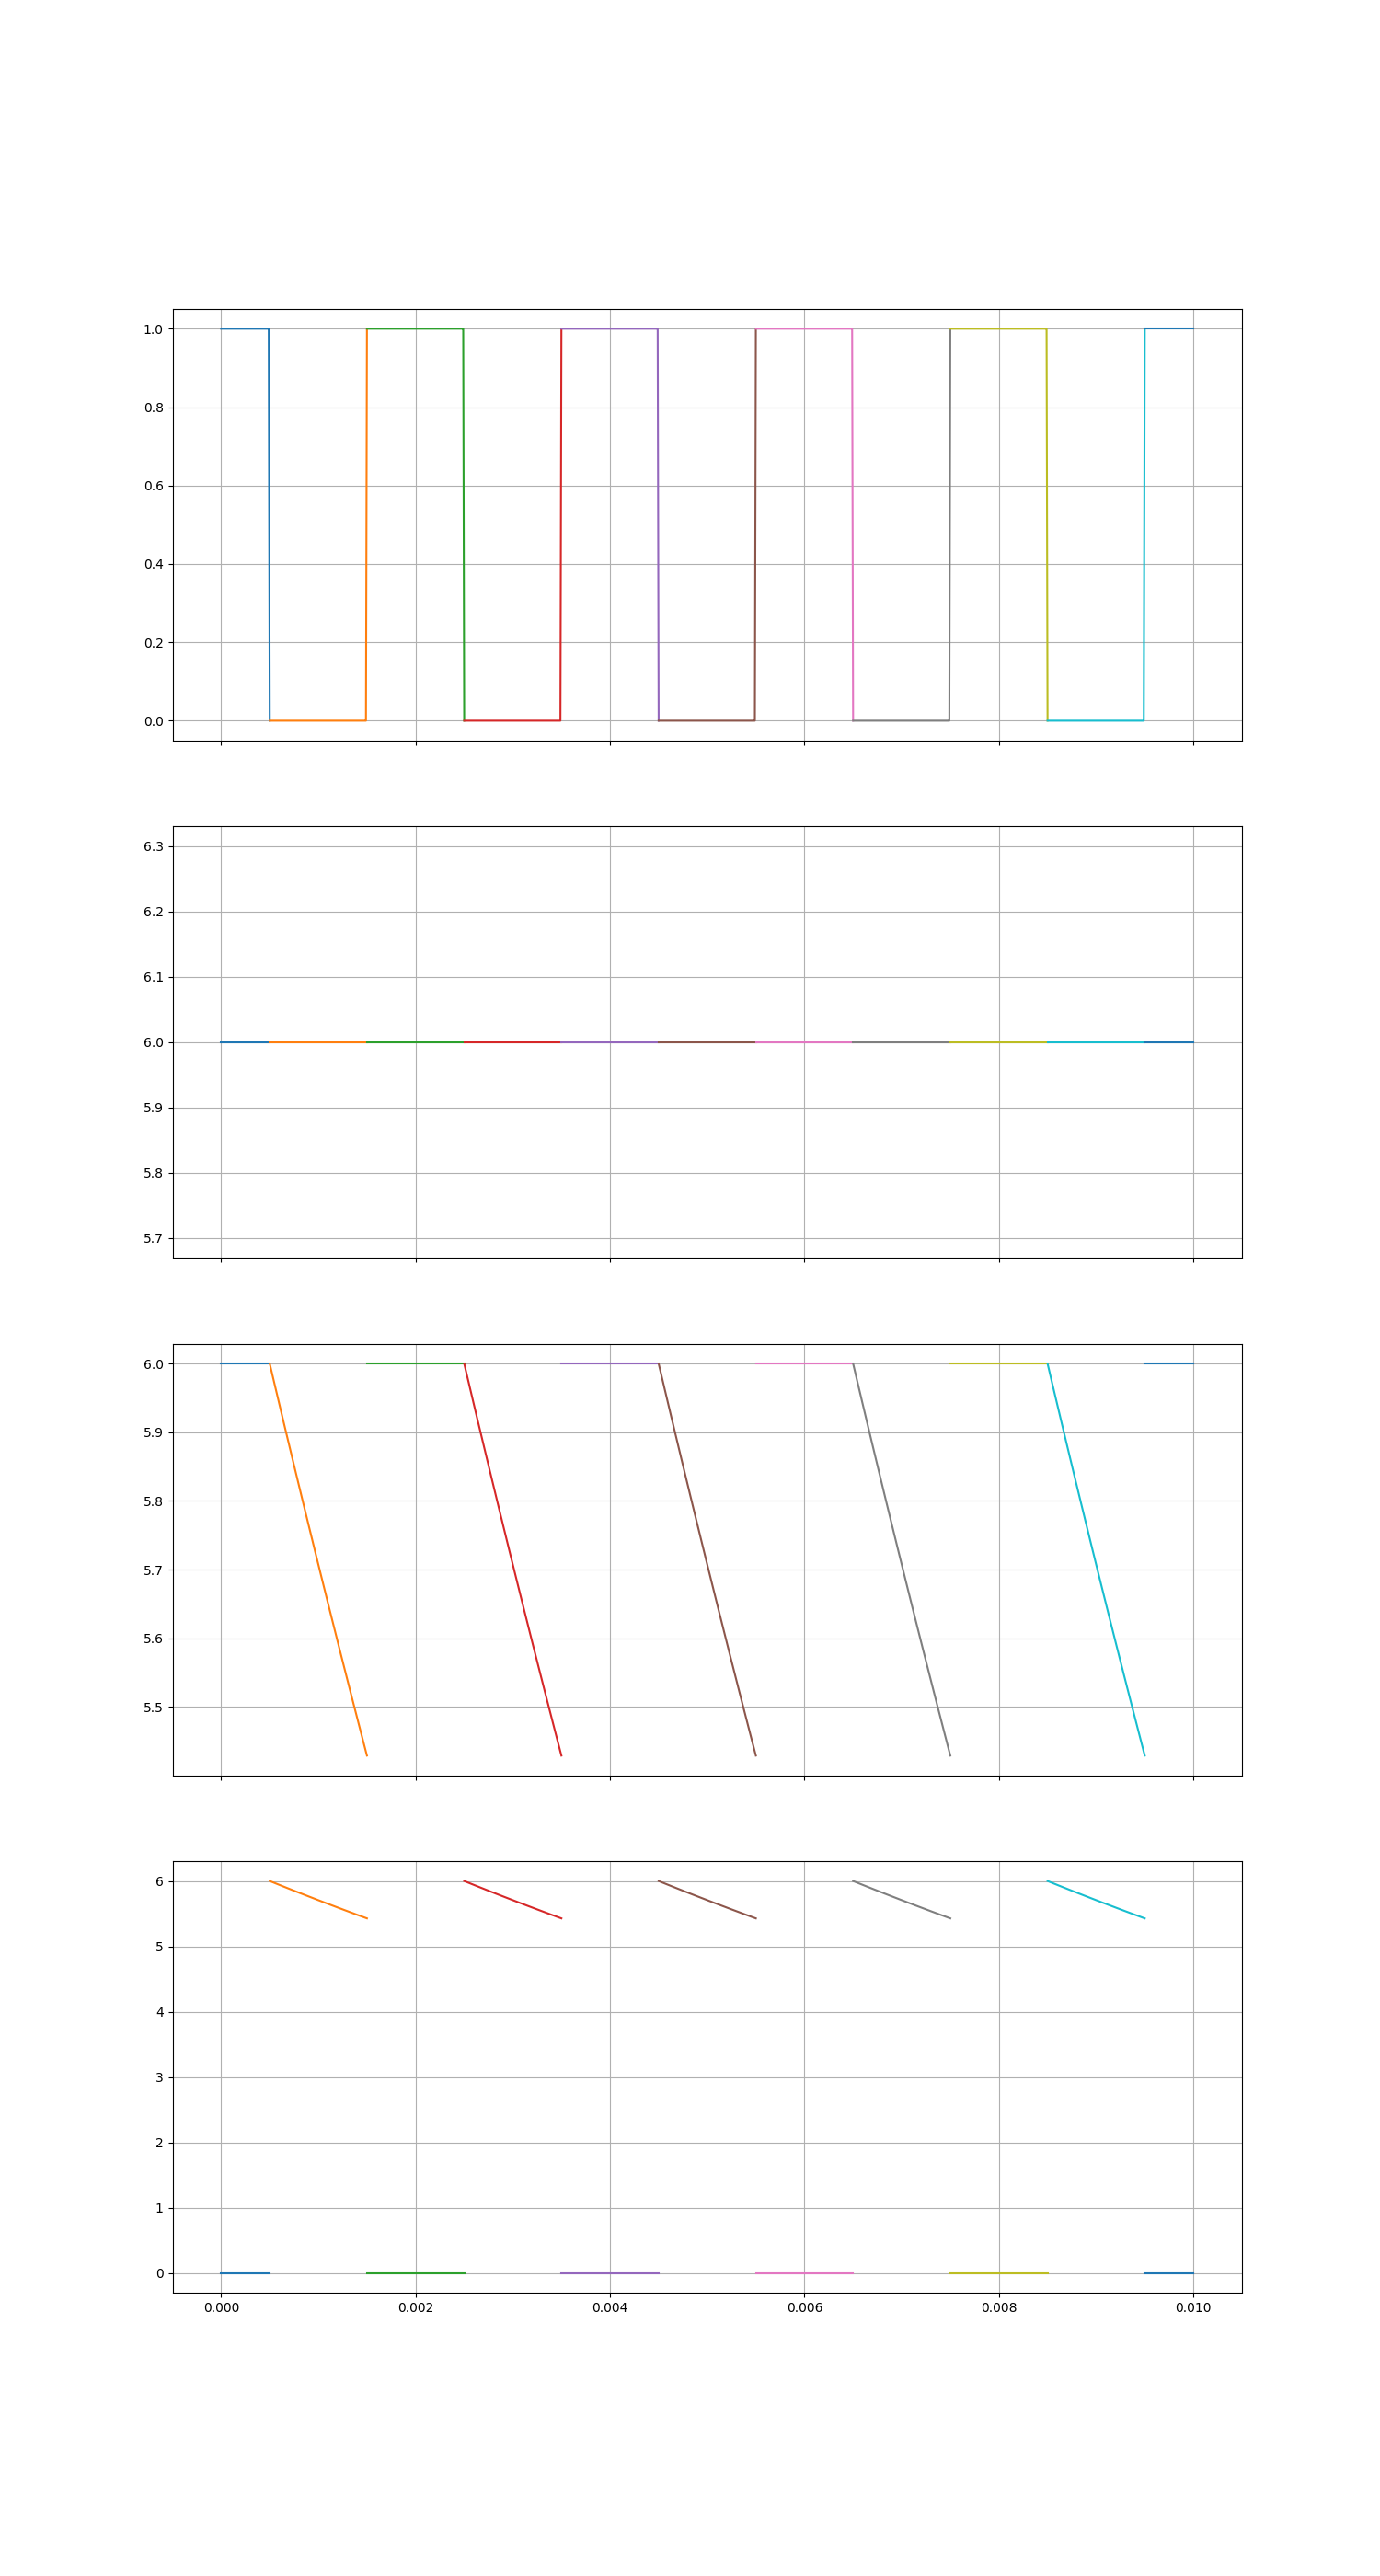

In [35]:
fig, axs = plt.subplots(4, figsize=[15, 28], sharex='all')

tmax = 10e-3
tstep = 1e-5

plotTranMeasurments(model, 0, tmax, tstep, [(t0, S > 0, "S(t)"),], axs[0])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vin, "Vout(t)"),], axs[1])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vc, "IL(t)"),], axs[2])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vout, "IL(t)"),], axs[3])

for ax in axs:
    ax.grid(True)
    #ax.legend(loc="best")

plt.show()